<a href="https://colab.research.google.com/github/amrithafarswani/IS833/blob/main/Amritha(Team2)_Cohort_Analysis_and_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cohort Analysis and Customer Segmentation**

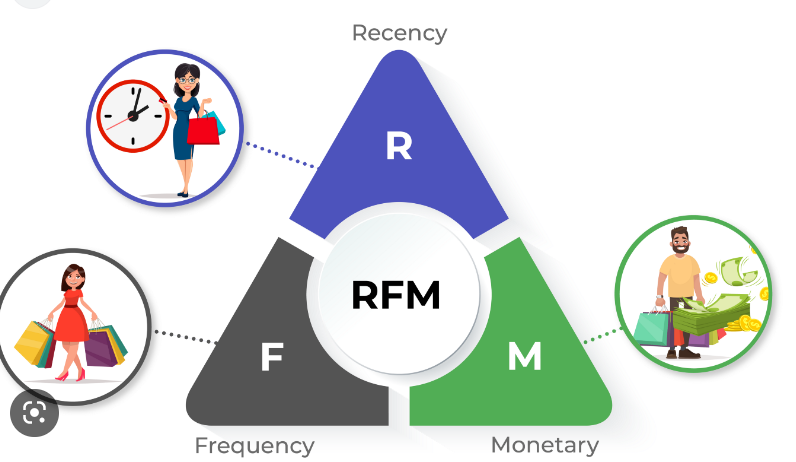

**Project Objective/Proposal**

Cohort analysis and customer segmentation are crucial for businesses, as they provide significant insights into customer behavior, facilitating the identification of actionable business opportunities. By analyzing customer behavior using the RFM (**Recency, Frequency, Monetary**) model, companies can better understand customer retention, churn rate, and customer lifetime value. This analysis enables the identification of high-value customers and allows businesses to design tailor-made services for specific customer segments, which can lead to increased revenue and customer loyalty. Additionally, having a deep understanding of customer behavior and preferences empowers businesses to optimize their marketing strategies, allocate resources efficiently, and improve overall business performance.

**Data Source**

The data is sourced from the UCI Machine Learning Repository and Kaggle. The dataset was donated by Dr. Daqing Chen, Director of the Public Analytics group at the School of Engineering, London South Bank University, UK.

**Meta Data:** https://archive.ics.uci.edu/ml/datasets/Online+Retail#\nhttps://www.kaggle.com/datasets/jihyeseo/online-retail-data-set-from-uci-ml-repo\

**Introduction & Motivation**

This project aims to perform cohort analysis and customer segmentation using RFM (Recency, Frequency, Monetary) analysis to gain insights into customer behavior and identify actionable business opportunities. The project involves creating cohort groups, calculating cohort periods, and analyzing customer behavior based on Recency, Frequency, and Monetary value. The analysis will also provide insights into customer retention, churn rate, and customer lifetime value with further exploratory analysis.

Further clarifying the terms Recency, Frequency, Monetary and what they mean in the retail industry context:

**Recency (R):** How recently customers have made their purchases.

**Frequency (F):** How often customers have made their purchases.

**Monetary (M)**: How much money customers have paid for their purchases.

**Questions:**
1. Is there a correlation between seasonality and buying trends?
2. Is there a correlation between prices and purchasing habits?
3. Is there a correlation between countries and orders?

**Answers:**
1. Yes, there were a larger number of sales during periods such as the end-of-year holiday season.
2. Lower prices created higher purchasing habits.
3. The U.K. had the highest number of orders with 3950 unique orders. Therefore with information like this, marketing efforts can be directed to countries that have the highest number of sales. 

**Exploratory Phase:**
Up to this point, we have completed the following steps:
1. Ensured the cleanliness of the data by removing any null values.
2. Identified the data types and determined the appropriate methods for working with them.
3. Conducted regression analysis on all numerical and Boolean variables to observe their impact on sales trends.
4. Utilized various graphs and visual aids to confirm the validity of our analysis.
5. Identified the month of the year with the highest sales volume and revenue.
6. Identified the locations with the highest sales volume.
7. Examined time series data to gain deeper insights into historical trends.

**Initial Conclusion:**
After conducting several analyses and creating various visualizations and charts, we confirmed that all of the hypotheses were correct. We also discovered that revenue is heavily influenced by a number of critical factors, including price and location. As a result, it is possible to predict revenue by leveraging these factors.

**Report Summary**
As to be expected, there is no single 'silver bullet' which can help to accurately predict the company, domestic, worldwide, or total revenue of the retail industry. While I performed several regressions on factors in the dataset, the variance in the modeling performed for now was still excessively variant. My most valuable information came in the form of analyzing top customers, top countries which generated most sales, and highest selling products. The majority of customers in the dataset are from the United Kingdom also making it part of our most popular region Europe. Bringing in around 3950 customers, we can decipher that the conversion rate is better in that region. Lastly, to continue data analysis, it would be ideal to analyze this data year-over-year, but this provided a great baseline for further investigation.

**Questions Ahead:**
1. What is the distribution of transactions by country? By month? by season?
2. How can we understand the distribution of products and their prices on the world geographic map?
3.  Are there any correlations between quantity purchased and price per unit?
4. How can we apply machine learning models using python on a large dataset to enhance forecasting capabilities to predict revenue?
5. What is the customer retention rate and how many customers made repeat purchases?

---

# **1. Data Analysis**

Each row of the dataset represents transnational data of transactions occuring between 01/12/2010 to 09/12/2011 for a UK-based, non-store online retail company. The company primarily sells unique all-occasion gifts, with many of their customers being wholesalers. The dataset comprises 541,909 instances, including 8 attributes: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country. Each of these columns are described below:

* **InvoiceNo**: invoice number of that transaction.
* **StockCode**: Item code of the item sold in that transaction.
* **Description**: Description of the item in that instance. 
* **Quantity**: Quantity bought of that unit. 
* **InvoiceDate**: Date of transaction.
* **UnitPrice**: Price per unit that was bought in that transaction.
* **CustomerID**: unique customer id representing each customer.
* **Country**: country of purchase of customer.

We will be using Python, Seaborn and 
Scikit-learn library to plot and analyze the data.

**Basic information:**

* 541909 rows
* 8 columns 


---



## **1.1. EDA (Exploratory Data Analysis) & Data Cleaning**

 Below, we've imported necessary packages and uploaded the CSV file to the dataset. We've checked for null values, and pulled up statistics as well.

**Importing Libraries:**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from matplotlib.pyplot import figure
import statsmodels.api as sm
from collections import Counter
from string import punctuation
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.plotting import scatterplotmatrix
import urllib.request
import os
import folium
from wordcloud import WordCloud
import matplotlib.cm as cm

**Dataset into a Pandas DataFrame:**

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)


In [ ]:
# Understanding what the dataset contains
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Getting info from first 5 rows to see how the data looks like
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Data cleaning:**

First, I wanted to check all the null values in the dataset.

In [ ]:
# Checking to see if there are any missing values in the data:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Checking the percentiles and other key statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Before blindly dropping columns with Null values, I wanted to see what the rest of the columns of those rows looked like, and if there was anything I could do to prevent dropping all that data.

In [ ]:
# Checking the other columns' data of the rows where the Description column has NaN values. 
missing_rows = df.loc[df.iloc[:, 2].isnull()]
missing_rows.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [ ]:
# Checking the other columns' data of the rows where the CustomerID column has NaN values.
missing_ids = df.loc[df.iloc[:, 6].isnull()]
missing_ids.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


To ensure data completeness, I generated a duplicate dataset (df_copy) and removed all records with incomplete Customer IDs from the original data (df). Given the large size of the dataset (over 500k rows), I eliminated around 100k rows with missing IDs from the original dataset.

In [ ]:
df_copy = df.copy()

# create a dictionary mapping stock codes to descriptions
code_to_desc = dict(zip(df['StockCode'], df['Description']))

# fill missing values in the Description column of dataset 2 using the dictionary
df_copy['Description'] = df_copy['Description'].fillna(df_copy['StockCode'].map(code_to_desc))

# save the updated dataset 2 to a new csv file
df_copy.to_csv("updated_dataset2.csv", index=False)


Above, to supplement missing data in both datasets for the Description column, I utilized a dictionary to fill in missing Descriptions from StockCodes where applicable. Rows that could not have their descriptions added due to unique Stockcodes were subsequently dropped.

In [ ]:
df_copy.isnull().sum()

InvoiceNo           0
StockCode           0
Description       689
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#Remove rows with missing values:
df_copy.dropna(subset=['Description'], inplace=True)
df_copy.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134391
Country             0
dtype: int64

In [ ]:
# fill missing values in Description column using values from StockCode column
df['Description'] = df['Description'].fillna(df['StockCode'].map(code_to_desc))
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       689
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

With the above methods, we can see that the null values in Description have dropped from 1454, to 689. I will go ahead and now drop all the remaining null values of the Description column.

In [ ]:
#Remove rows with missing values:
df.dropna(subset=['CustomerID'], inplace=True)

In [ ]:
#Check for duplicates:
df.duplicated().sum()

#Remove duplicates:
df.drop_duplicates(inplace=True)

#Check for duplicates:
df_copy.duplicated().sum()

#Remove duplicates:
df_copy.drop_duplicates(inplace=True)

#Convert InvoiceDate to datetime data type:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df_copy['InvoiceDate'] = pd.to_datetime(df_copy['InvoiceDate'])

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df_copy.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134348
Country             0
dtype: int64

Although the primary method of analysis will be **RFM analysis**, it provides a high-level view of customer behavior. There are several other analyses that can be performed on this dataset to gain further insights into customer behavior and preferences. Here are a few other steps I am going to take:

**Customer segmentation**: In addition to the RFM analysis, I will use clustering techniques such as clustering to segment customers into distinct groups based on attributes such as geography. I could have also used demographics or psychographics if I had this information. This will help to tailor marketing and product strategies to different customer segments.

**Analyze product popularity**: I will further analyze which products are the most popular among customers by counting the number of times each product appears in the dataset and by calculating the total revenue generated by each product. This will help understand which products are driving sales and identify opportunities for cross-selling or upselling.

**Identifying seasonal trends**: I will analyze trends in customer behavior over time by examining how the RFM values change throughout the year. This can help identify seasonal trends or patterns in customer behavior, such as increased purchasing activity during holidays or seasonal events.

**Analyze customer churn**: I will analyze customer churn rates by calculating the percentage of customers who have not made a purchase within a certain time period (e.g., 30 days, 60 days). This will help identify customers who are at risk of churning and take proactive steps to retain them.

**Sentiment analysis**: If there was additional data such as customer reviews or feedback, I could have performed sentiment analysis to understand customer sentiment towards the products. This would help identify areas for improvement or address potential issues before they become major problems.


---



# **2. RFM Analysis**

**Why Analyze Data as RFM?**

The RFM model is a customer segmentation technique that is commonly used in marketing to identify different groups of customers based on their purchasing behavior.
RFM analysis enables marketers to increase revenue by targeting specific groups of existing customers (i.e., customer segmentation) with messages and offers that are more likely to be relevant based on data about a particular set of behavior

**Insights into customer behavior and RFM analysis**
This code calculates the Recency, Frequency, and Monetary (RFM) values for each customer in a dataset. 

**Monetary value:** the total amount of money spent by each customer, calculated as the sum of the UnitPrice multiplied by the Quantity of each product purchased.

**Frequency value:** the number of unique invoices for each customer.

**Recency value:** the number of days since each customer's most recent purchase, calculated as the difference between the maximum date in the dataset and the date of the customer's last purchase.

The results for each of these values are combined into a single DataFrame called 'rfm', which is then used to compute descriptive statistics using the 'describe()' method.

In [ ]:
# What is the distribution of Recency, Frequency, and Monetary value?
# Calculate the Monetary value
monetary_value = df.groupby('CustomerID').agg({'UnitPrice': lambda x: sum(x * df.loc[x.index, 'Quantity'])})

# Calculate the Frequency value
frequency_value = df.groupby('CustomerID').agg({'InvoiceNo': 'nunique'})

# Calculate the Recency value
max_date = df['InvoiceDate'].max()
recency_value = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (max_date - x.max()).days})

# Combine the values into a single DataFrame
rfm = pd.DataFrame({'Recency': recency_value['InvoiceDate'], 'Frequency': frequency_value['InvoiceNo'], 'Monetary': monetary_value['UnitPrice']})

rfm.describe()

,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000
mean,91.047118,5.075480,1893.531433
std,100.765435,9.338754,8218.696204
min,0.000000,1.000000,-4287.630000
25%,16.000000,1.000000,291.795000
50%,49.000000,3.000000,644.070000
75%,142.000000,5.000000,1608.335000
max,373.000000,248.000000,279489.020000


The output shows the descriptive statistics for the Recency, Frequency, and Monetary values of the customers in the dataset.

- The 'count' row indicates the number of customers in the dataset.
- The 'mean' row shows the average (mean) value for each of the three variables across all customers.
- The 'std' row shows the standard deviation for each variable, which is a measure of the variability of the data around the mean.
- The 'min' and 'max' rows show the smallest and largest values for each variable, respectively.
- The '25%', '50%', and '75%' rows indicate the quartiles of the data distribution. For example, the '50%' row (also known as the median) shows that half of the customers have a Recency value of less than 49 days, while the other half have a Recency value greater than 49 days.

Overall, the statistics suggest that the average customer in the dataset has made **5 purchases **(Frequency), the most recent purchase was **91 days ago** (Recency), and the total amount spent (Monetary) is **1893.53**. 

However, the large standard deviation for the Monetary value suggests that there may be a wide range of spending behaviors among customers. Additionally, the negative minimum value for the Monetary variable suggests that some customers may have returned items, resulting in a negative total spending value.

In [ ]:
#How many unique customers are there in the dataset?
unique_customers = df['CustomerID'].nunique()
print(f"Number of unique customers: {unique_customers}")

#What is the average number of transactions per customer?
avg_transactions_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique().mean()
print(f"Average number of transactions per customer: {avg_transactions_per_customer:.2f}")

#What is the average revenue per transaction?
df['Revenue'] = df['UnitPrice'] * df['Quantity']
avg_revenue_per_transaction = df['Revenue'].sum() / df['InvoiceNo'].nunique()
print(f"Average revenue per transaction: {avg_revenue_per_transaction:.2f}")


Number of unique customers: 4372
Average number of transactions per customer: 5.08
Average revenue per transaction: 373.07


            Recency  Frequency  Monetary  R        F  M RFM_Score
CustomerID                                                       
12346.0         326          2      0.00  1  (0, 62]  1   (2, 64]
12347.0           2          7   4310.00  4  (0, 62]  4   (8, 70]
12348.0          75          4   1797.24  2  (0, 62]  4   (6, 68]
12349.0          19          1   1757.55  3  (0, 62]  4   (7, 69]
12350.0         310          1    334.40  1  (0, 62]  2   (3, 65]


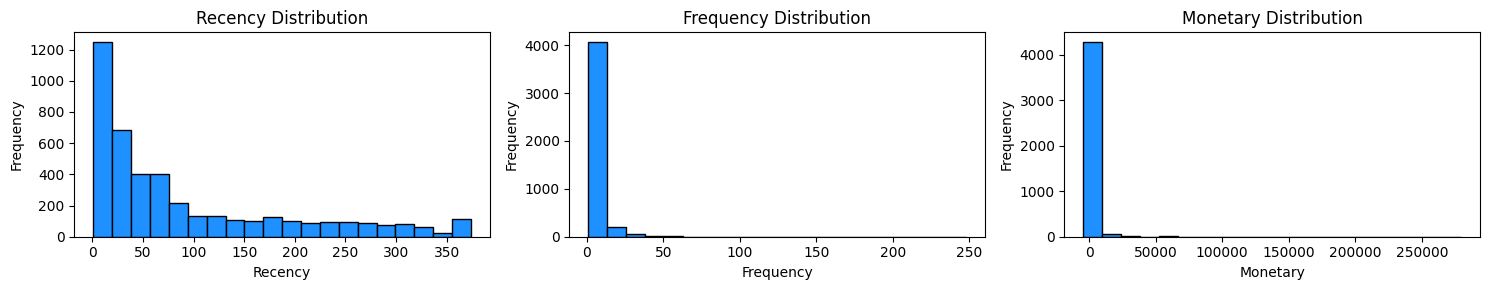

In [ ]:
#How does the customer count vary across RFM segments (e.g., High Recency, High Frequency, High Monetary)?
# Drop missing values in 'InvoiceNo' and 'CustomerID' columns
df = df.dropna(subset=['InvoiceNo', 'CustomerID'])

# Calculate the TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Calculate Recency, Frequency, and Monetary
snapshot_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})

# Define the segments by creating bins based on percentiles
rfm['R'] = pd.qcut(rfm['Recency'], 4, labels=list(range(4, 0, -1)))
rfm['F'] = pd.cut(rfm['Frequency'], bins=pd.interval_range(start=0, end=rfm['Frequency'].max() + 1, freq=rfm['Frequency'].max() // 4), labels=list(range(1, 5)), include_lowest=True)
rfm['M'] = pd.qcut(rfm['Monetary'], 4, labels=list(range(1, 5)))

# Calculate the RFM_Score
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis=1)

# Display the RFM DataFrame
print(rfm.head())

# Plot the distribution of Recency, Frequency, and Monetary values
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

axes[0].hist(rfm['Recency'], bins=20, color='dodgerblue', edgecolor='k')
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Recency')
axes[0].set_ylabel('Frequency')

axes[1].hist(rfm['Frequency'], bins=20, color='dodgerblue', edgecolor='k')
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Frequency')

axes[2].hist(rfm['Monetary'], bins=20, color='dodgerblue', edgecolor='k')
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Monetary')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()




Using the **Pareto Principle**, also known as the **80/20 rule**, suggests that in retail, 80% of a company's sales come from 20% of its customers. It means that a small percentage of customers generate a large proportion of revenue for a business. The principle can also be applied to inventory management, where 80% of a company's revenue comes from 20% of its products. This suggests that businesses should focus their efforts on retaining high-value customers and managing inventory of their top-performing products, rather than spreading resources equally across all customers and products.

In [ ]:
#What is the percentage of revenue generated by the top 20% of customers (Pareto principle)?
top_20_customers = rfm['Monetary'].nlargest(int(0.2 * len(rfm)))
top_20_revenue = top_20_customers.sum()
total_revenue = rfm['Monetary'].sum()
percentage_revenue = (top_20_revenue / total_revenue) * 100
print(f"Percentage of revenue generated by top 20% customers: {percentage_revenue:.2f}%")

Percentage of revenue generated by top 20% customers: 73.90%


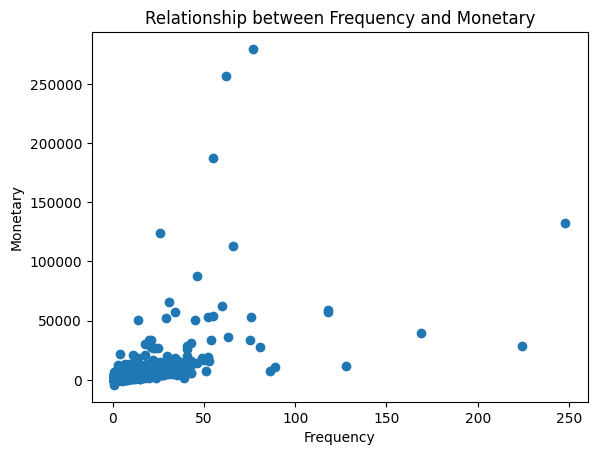

In [ ]:
# Create a scatter plot of Frequency vs. Monetary
plt.scatter(rfm['Frequency'], rfm['Monetary'])

# Set the x-axis label
plt.xlabel('Frequency')

# Set the y-axis label
plt.ylabel('Monetary')

# Set the title of the plot
plt.title('Relationship between Frequency and Monetary')

# Display the plot
plt.show()


The scatter plot above shows the distribution of customer purchases based on their frequency and monetary value, and any correlation or relationship between the two variables can be seen above.

Each point on the graph represents a single customer, with the x and y values corresponding to their frequency and monetary value, respectively. The scatter plot shows a positive correlation between frequency and monetary value, which means that customers who make more purchases tend to spend more money overall. However, there are some customers who make a high number of purchases but spend relatively little money, as shown by the points clustered in the bottom-left corner of the graph. Conversely, there are also some customers who make relatively few purchases but spend a large amount of money, as shown by the points clustered in the right corner of the graph.

<ipython-input-23-977c6550426c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rfm_corr = rfm.corr()


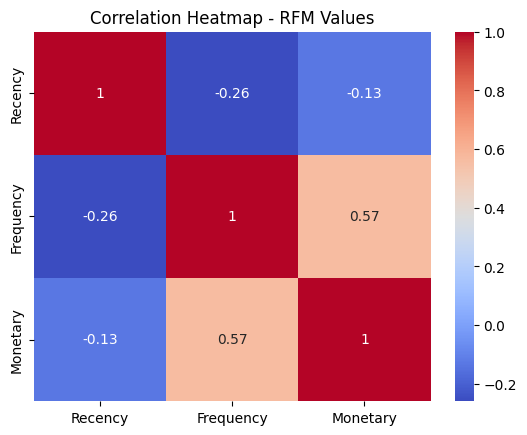

In [ ]:
# Create a correlation matrix for the RFM values
rfm_corr = rfm.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(rfm_corr, cmap="coolwarm", annot=True)

# Set the plot title
plt.title("Correlation Heatmap - RFM Values")

# Show the plot
plt.show()

Above is a heatmap of the correlation matrix for the RFM values. The heatmap visualizes the correlation between the RFM values in the dataset. Each square represents the correlation between two RFM values. The color of the square indicates the strength and direction of the correlation, with warmer colors (e.g., red) indicating a positive correlation and cooler colors (e.g., blue) indicating a negative correlation. The numeric values in each cell of the heatmap indicate the strength of the correlation between the corresponding RFM values.

By examining the heatmap, we can identify which RFM values are strongly correlated with each other and which ones are weakly correlated. For example, the heatmap shows a negative correlation between Recency and Frequency, suggesting that customers who have made more recent purchases tend to make less frequent purchases as well. Similarly, if there is a strong negative correlation between Recency and Monetary, it suggests that customers who have made purchases less recently tend to spend less money than those who have made purchases more recently. Overall, the heatmap helps us identify patterns and relationships in the data that may not be immediately obvious from a simple summary or descriptive statistics.


---



# **3. Customer segmentation**

In addition to the RFM analysis, I will use clustering techniques such as clustering to segment customers into distinct groups based on attributes such as geography. I could have also use demographics or psychographics if this information was available. This helps to tailor marketing and product strategies to different customer segments.


**Who are the top 10 customers in terms of total spending and how much did each spend?**


Netherlands, Australia, Lebanon, Japan, Israel, Brazil, RSA, Singapore, Denmark, Norway were the countries with the highest average value per order, whereas the UK had the highest number of customers. This will help us adjust our products, marketing, and inventory mix.

In [ ]:
#What is the distribution of customers by country?
customer_country = df.groupby('Country')['CustomerID'].nunique()
print(customer_country)


Country
Australia                  9
Austria                   11
Bahrain                    2
Belgium                   25
Brazil                     1
Canada                     4
Channel Islands            9
Cyprus                     8
Czech Republic             1
Denmark                    9
EIRE                       3
European Community         1
Finland                   12
France                    87
Germany                   95
Greece                     4
Iceland                    1
Israel                     4
Italy                     15
Japan                      8
Lebanon                    1
Lithuania                  1
Malta                      2
Netherlands                9
Norway                    10
Poland                     6
Portugal                  19
RSA                        1
Saudi Arabia               1
Singapore                  1
Spain                     31
Sweden                     8
Switzerland               21
USA                        4
United

In [ ]:
#What is the average order value per country?
#What are the top 10 countries with the highest average order value?
average_order_value_country = df.groupby('Country')['Revenue'].sum() / df.groupby('Country')['InvoiceNo'].nunique()
average_order_value_country.sort_values(ascending=False).head(10)
print(average_order_value_country.sort_values(ascending=False).head(10))



Country
Netherlands    2818.431089
Australia      1985.648841
Lebanon        1693.880000
Japan          1262.165000
Israel         1164.733333
Brazil         1143.600000
RSA            1002.310000
Singapore       912.039000
Denmark         893.720952
Norway          879.086500
dtype: float64


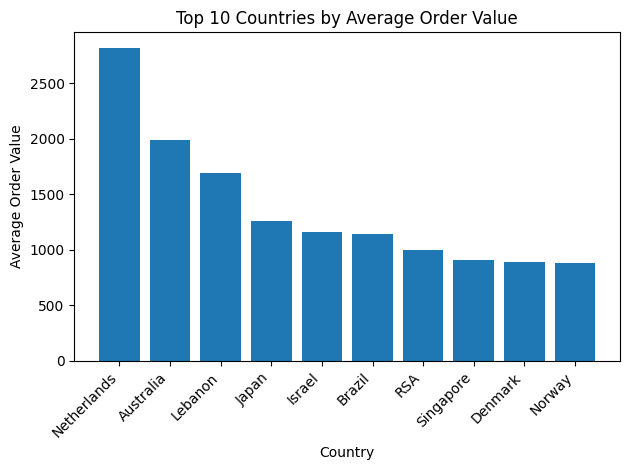

In [ ]:

#Bar graph displaying top 10 countries with the highest average order value
top_10_countries = average_order_value_country.sort_values(ascending=False).head(10)

plt.figure()
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.title('Top 10 Countries by Average Order Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The map below shows the distribution of customers by country. The countries are color-coded according to the number of unique CustomerIDs in each country, and the legend on the right side of the map shows the color scale used. The darker shades of green indicate higher numbers of unique CustomerIDs in a country, while the lighter shades indicate lower numbers. Hovering over a country on the map shows the name of the country and the number of unique CustomerIDs in that country. The Layer Control on the top right of the map allows us to turn the choropleth layer on or off, and switch to a satellite or terrain view of the map.

In [ ]:
# Count the number of customers by country
customer_count = df.groupby('Country')['CustomerID'].nunique().reset_index()

# Create the data directory if it does not exist
if not os.path.exists('data'):
    os.makedirs('data')

# Load the world-countries.json file from folium
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
filename = 'world-countries.json'
urllib.request.urlretrieve(f'{url}/{filename}', f'data/{filename}')

# Create a choropleth map
m = folium.Map(location=[0, 0], zoom_start=2)
folium.Choropleth(
    geo_data='data/world-countries.json',
    name='choropleth',
    data=customer_count,
    columns=['Country', 'CustomerID'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Customers'
).add_to(m)
folium.LayerControl().add_to(m)
m


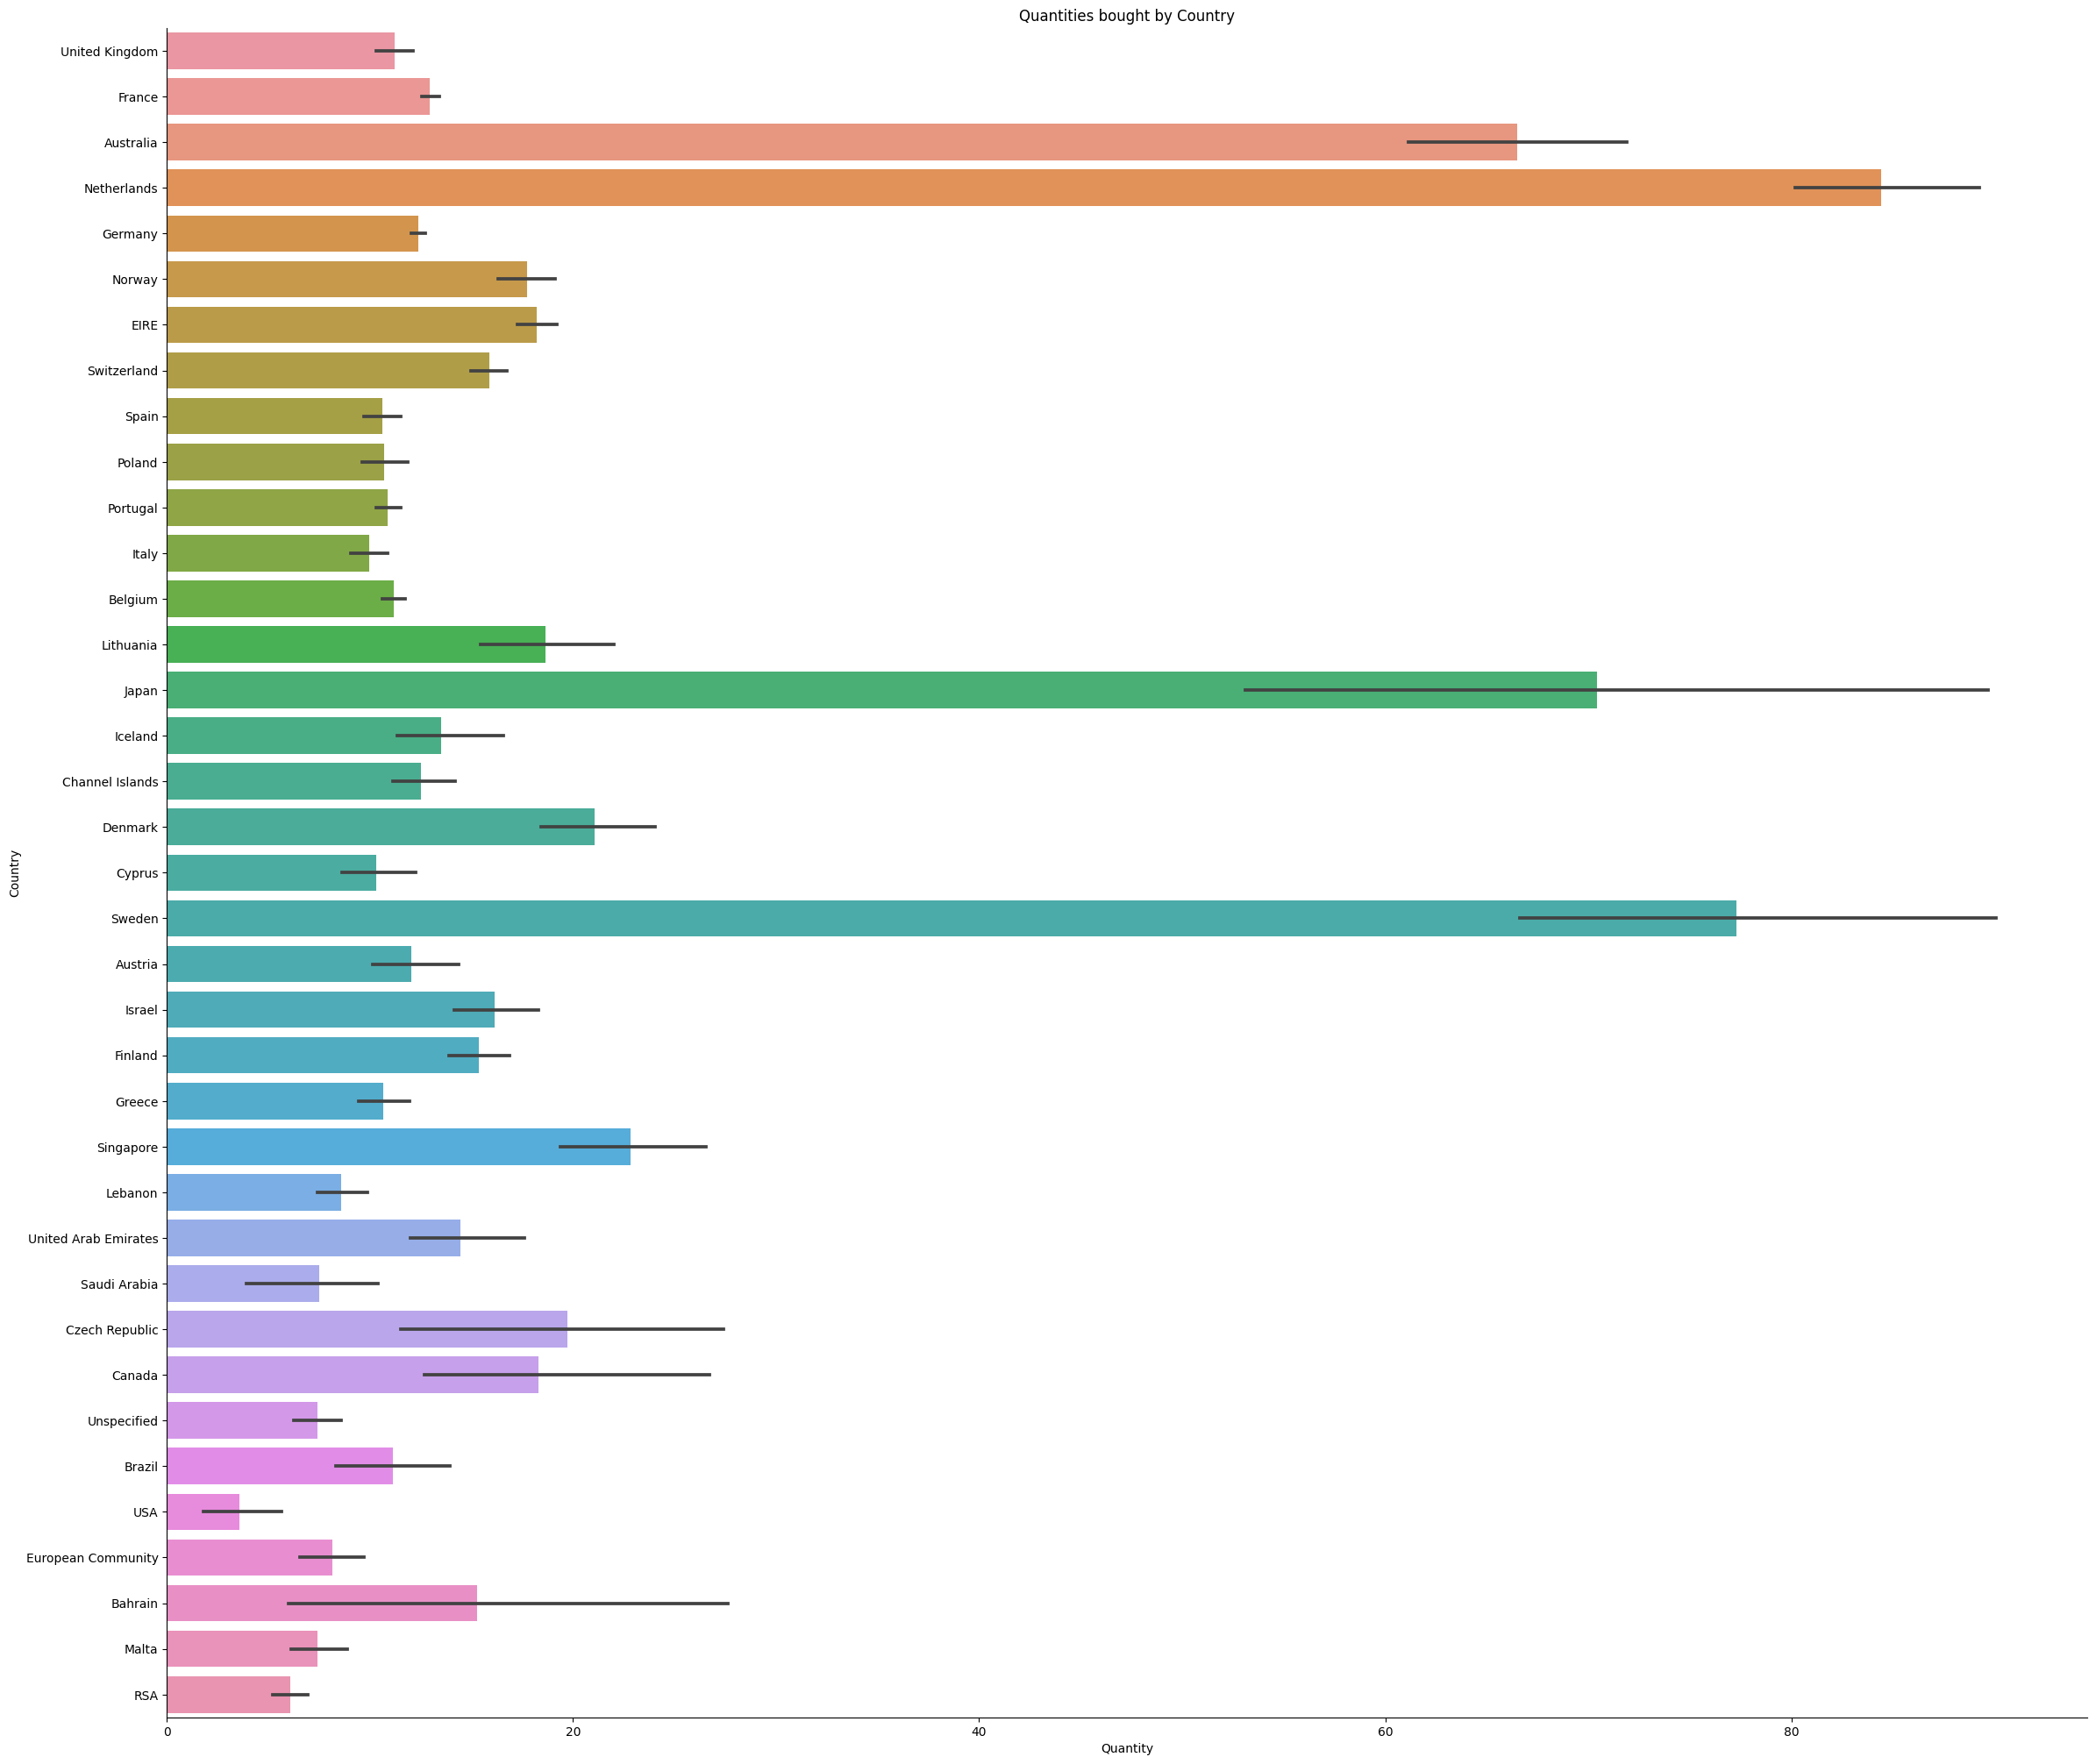

In [ ]:
sns.catplot(x="Quantity", y="Country", kind="bar", data = df, height = 20, aspect = 12/10)
plt.title('Quantities bought by Country');



---



# **4. Analyze Product Popularity**

**What is the most popular product, and why is this important?**

Determining the most popular products among customers using various methods, including counting the frequency of each product in the dataset, computing the total revenue generated by each product, and identifying the top 10 most commonly used words in product descriptions will enable us to gain insight into the products that are driving sales and identify potential opportunities for cross-selling and upselling. The most popular product is the white hanging tea light holder.

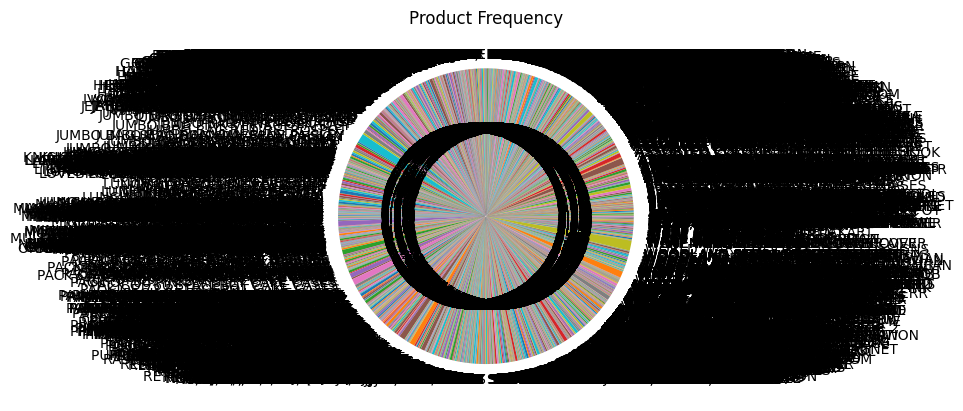

In [ ]:
# group the DataFrame by StockCode and sum the Quantity to get the frequency
freq = df.groupby("Description")["Quantity"].sum()

# filter out any negative values from freq
freq = freq[freq >= 0]

# create a pie chart of the frequency of products bought
plt.pie(freq.values, labels=freq.index, autopct='%1.1f%%')
plt.title('Product Frequency')
plt.show()


In [ ]:
#What are the top 10 most popular products based on the number of transactions?
top_products = df['Description'].value_counts().head(10)
print(top_products)


WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
Name: Description, dtype: int64


In [ ]:
# group the DataFrame by StockCode and sum the Quantity to get the frequency
freq = df.groupby("StockCode")["Quantity"].sum()

# print out the result
print(freq)

StockCode
10002     823
10080     291
10120     192
10125    1225
10133    2363
         ... 
D       -1194
DOT        16
M        2944
PADS        4
POST     3002
Name: Quantity, Length: 3684, dtype: int64


In [ ]:
# Calculate the total revenue generated by each product
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']
product_revenue = df.groupby('Description')['TotalRevenue'].sum().sort_values(ascending=False)

# Print the top 10 products by total revenue
print(product_revenue.head(10))


Description
REGENCY CAKESTAND 3 TIER              132567.70
WHITE HANGING HEART T-LIGHT HOLDER     93767.80
JUMBO BAG RED RETROSPOT                83056.52
PARTY BUNTING                          67628.43
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56331.91
RABBIT NIGHT LIGHT                     51042.84
CHILLI LIGHTS                          45915.41
PAPER CHAIN KIT 50'S CHRISTMAS         41423.78
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: TotalRevenue, dtype: float64


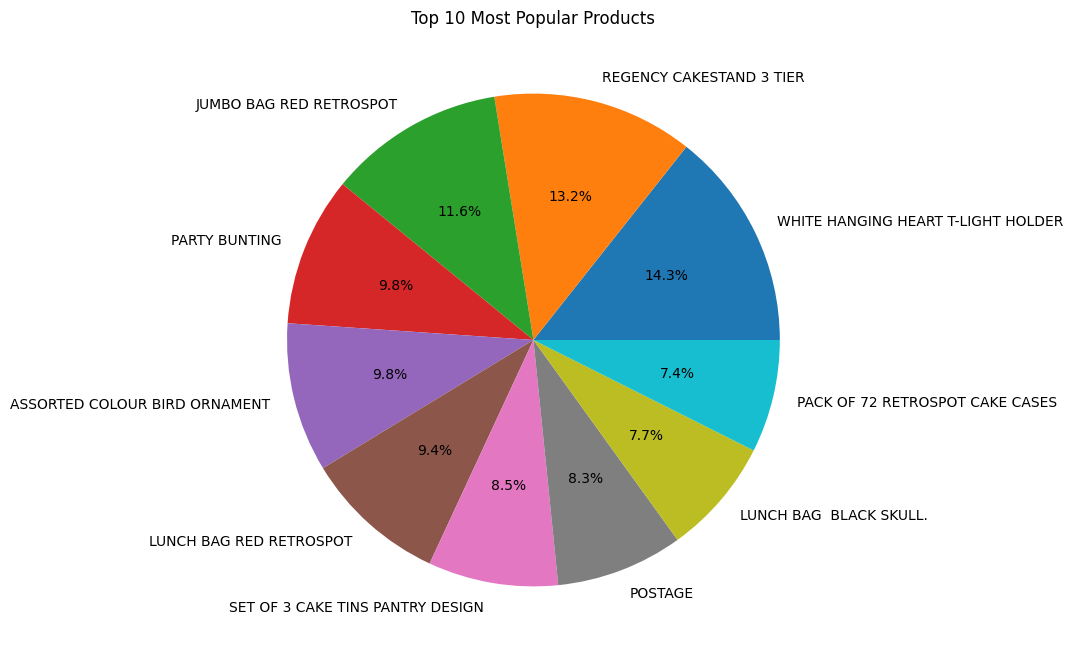

In [ ]:
# Get the top 10 most popular products based on the number of transactions
top_products = df['Description'].value_counts().head(10)

# Create a pie chart of the top 10 products
plt.figure(figsize=(8,8))
plt.pie(top_products.values, labels=top_products.index, autopct='%1.1f%%')
plt.title('Top 10 Most Popular Products')
plt.show()


Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
JUMBO BAG RED RETROSPOT               44963
ASSORTED COLOUR BIRD ORNAMENT         35215
WHITE HANGING HEART T-LIGHT HOLDER    34128
PACK OF 72 RETROSPOT CAKE CASES       33386
POPCORN HOLDER                        30492
RABBIT NIGHT LIGHT                    27045
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25305
PACK OF 60 PINK PAISLEY CAKE CASES    24129
Name: Quantity, dtype: int64


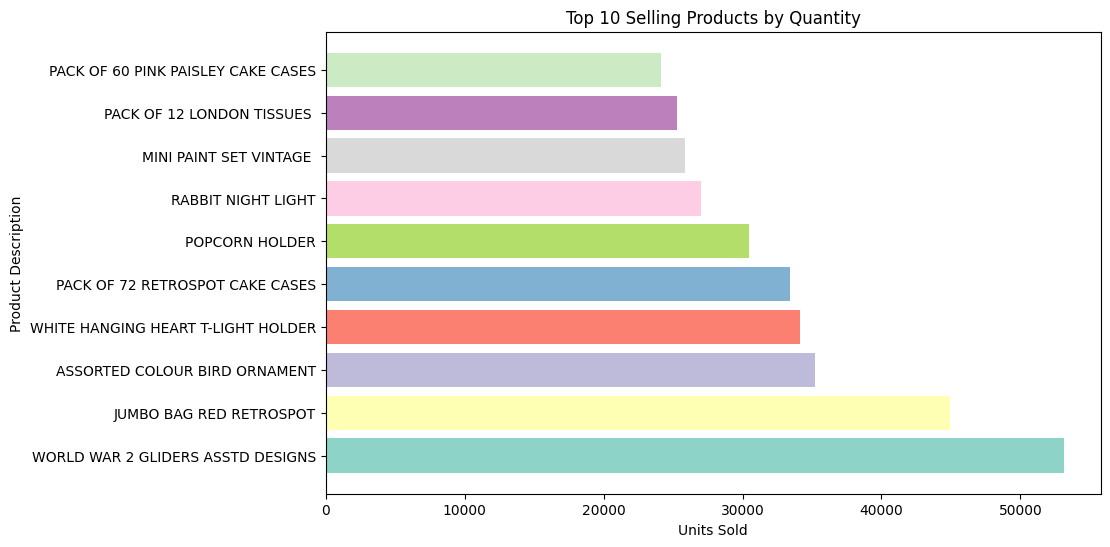

In [ ]:
# Group data by 'Description' and sum 'Quantity'
product_sales = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Print top 10 products and their sales
print(product_sales.head(10))

# Create a list of colors for the bars
colors = cm.Set3(np.arange(10)/10.)

# Create a horizontal bar chart of top 10 products with colored bars
plt.figure(figsize=(10, 6))
plt.barh(product_sales.head(10).index, product_sales.head(10).values, color=colors)
plt.xlabel('Units Sold')
plt.ylabel('Product Description')
plt.title('Top 10 Selling Products by Quantity')
plt.show()


In [ ]:
#What are the top 10 most common words in product descriptions?
product_descriptions = df['Description'].dropna().tolist()
word_count = Counter(" ".join(product_descriptions).translate(str.maketrans("", "", punctuation)).split()).most_common(10)
print(word_count)


[('SET', 41053), ('OF', 40858), ('BAG', 38090), ('RED', 32254), ('HEART', 29375), ('RETROSPOT', 26754), ('VINTAGE', 25761), ('DESIGN', 23663), ('PINK', 20264), ('CHRISTMAS', 19082)]


In [ ]:
# Count the number of times each product appears in the dataset
product_counts = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Print the top 10 most popular products by number of times it appears in the dataset
print(product_counts.head(10))


Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
JUMBO BAG RED RETROSPOT               44963
ASSORTED COLOUR BIRD ORNAMENT         35215
WHITE HANGING HEART T-LIGHT HOLDER    34128
PACK OF 72 RETROSPOT CAKE CASES       33386
POPCORN HOLDER                        30492
RABBIT NIGHT LIGHT                    27045
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25305
PACK OF 60 PINK PAISLEY CAKE CASES    24129
Name: Quantity, dtype: int64


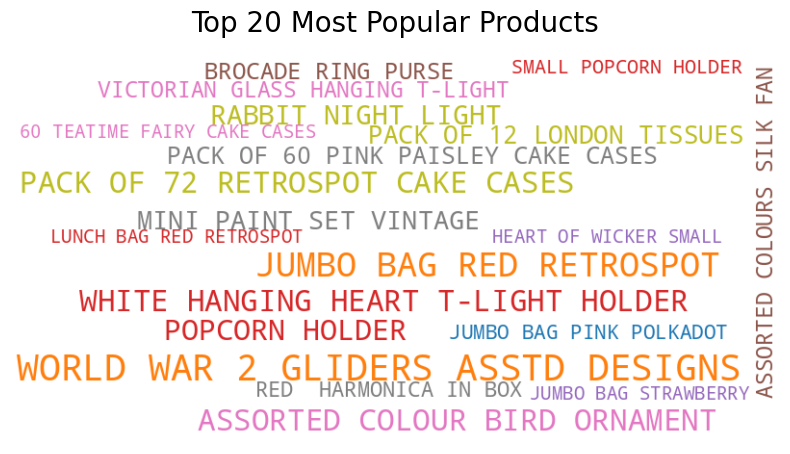

In [ ]:
# Get the top 20 most popular products by number of times they appear in the dataset
top_products = product_counts.head(20)

# Create a WordCloud object with the top products
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10', max_words=20).generate_from_frequencies(top_products)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 5))

# Display the word cloud
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_title('Top 20 Most Popular Products', fontsize=20, pad=20)
ax.axis('off')
plt.show()


In [ ]:
# make a copy of df to avoid altering original data
df_association = df.copy()

# Preprocess the data
df_association = df_association[df_association['Country'] == 'United Kingdom']
df_association = df_association.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

# Encode the data
def encode_units(x):
    if x <= 0:
        return 0
    else:
        return 1
basket_sets = df_association.applymap(encode_units)

# Generate frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print the association rules
print(rules.head())

                            antecedents                           consequents  \
0           (ALARM CLOCK BAKELIKE RED )          (ALARM CLOCK BAKELIKE GREEN)   
1          (ALARM CLOCK BAKELIKE GREEN)           (ALARM CLOCK BAKELIKE RED )   
2  (GARDENERS KNEELING PAD CUP OF TEA )   (GARDENERS KNEELING PAD KEEP CALM )   
3   (GARDENERS KNEELING PAD KEEP CALM )  (GARDENERS KNEELING PAD CUP OF TEA )   
4     (GREEN REGENCY TEACUP AND SAUCER)      (PINK REGENCY TEACUP AND SAUCER)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.038173            0.034748  0.022863    0.598945  17.236584   
1            0.034748            0.038173  0.022863    0.657971  17.236584   
2            0.031576            0.037367  0.023065    0.730463  19.548240   
3            0.037367            0.031576  0.023065    0.617251  19.548240   
4            0.030820            0.024828  0.020345    0.660131  26.588673   

   leverage  conviction  
0  0.021537    2.4

The output above is a table that shows the results of an association rule mining algorithm. The table includes the following columns:

- **antecedents**: The item(s) that are found in the antecedent of the association rule.
- **consequents**: The item(s) that are found in the consequent of the association rule.
- **antecedent support**: The proportion of transactions in the dataset that contain the antecedent item(s).
- **consequent support**: The proportion of transactions in the dataset that contain the consequent item(s).
- **support**: The proportion of transactions in the dataset that contain both the antecedent and consequent item(s).
- **confidence**: The proportion of transactions that contain the antecedent item(s) that also contain the consequent item(s).
- **lift**: The ratio of observed support to that expected if the antecedent and consequent were independent.
- **leverage**: The difference between the observed support and that expected if the antecedent and consequent were independent.
- **conviction**: The ratio of the expected frequency that the antecedent occurs without the consequent, to the observed frequency of incorrect predictions.

*The output means that there are some strong associations between the antecedent and consequent items. For example, the first row shows that customers who buy the "ALARM CLOCK BAKELIKE RED" are likely to buy the "ALARM CLOCK BAKELIKE GREEN" too, with a confidence of 0.59 and a lift of 17.24. The higher the confidence and lift values, the stronger the association between the items. The leverage and conviction values are used to determine whether the association is statistically significant.This algorithm can help the retailer "suggest" items to potential customers, much like Amazon creates associations.*



---



# **5. Identifying Seasonal Trends**

**What seasons are imporant to the business?**

We will analyze trends in seasons over time by examining how sales change throughout the year. This can help identify seasonal trends or patterns in customer behavior, such as increased purchasing activity during holidays or seasonal events. This will also enable the business to create season specfic deals, sales and events. 

In [ ]:
#What is the month with the highest and lowest number of transactions?
df['Month'] = df['InvoiceDate'].dt.month
transactions_by_month = df.groupby('Month')['InvoiceNo'].nunique()
print(transactions_by_month)


Month
1     1236
2     1202
3     1619
4     1384
5     1849
6     1707
7     1593
8     1544
9     2078
10    2263
11    3086
12    2629
Name: InvoiceNo, dtype: int64


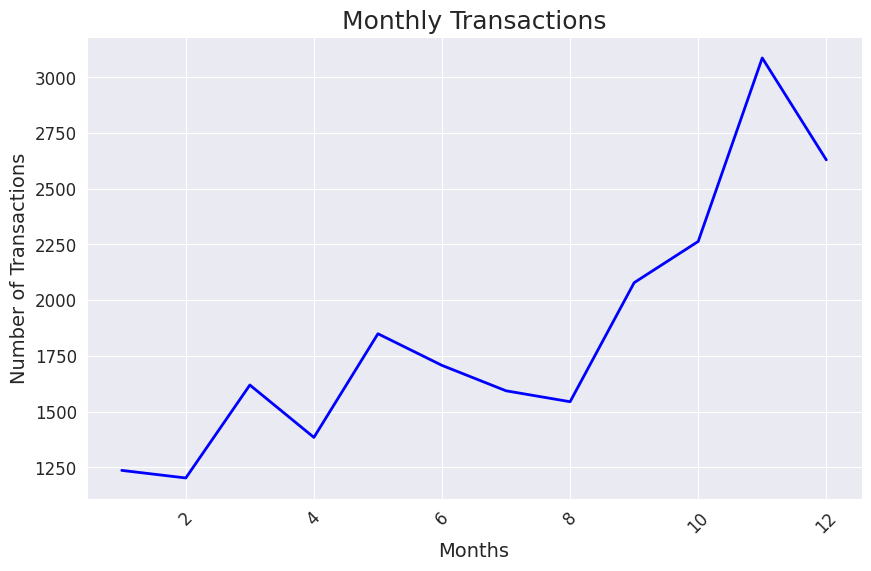

In [ ]:
# Setting the style of the chart
sns.set_style('darkgrid')

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(transactions_by_month.index, transactions_by_month.values, color='blue', linewidth=2)

# Adding title and axis labels
plt.title('Monthly Transactions', fontsize=18)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)

# Setting the tick labels
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Displaying the plot
plt.show()



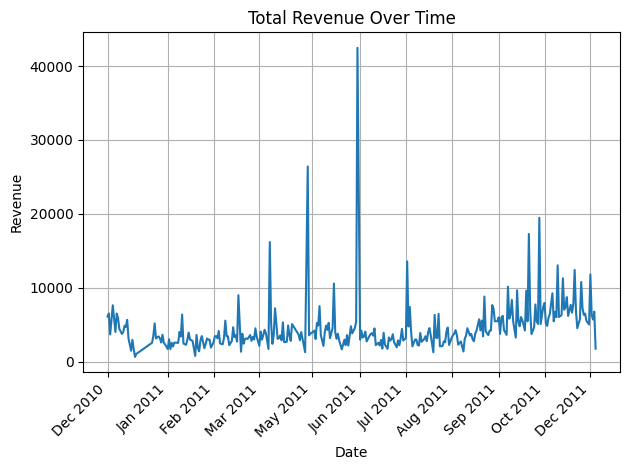

In [ ]:
# Group the data by date to get the total revenue for each day
revenue_by_date = df.groupby(df['InvoiceDate'].dt.date)['UnitPrice'].sum()

# Create the line chart
plt.plot(revenue_by_date.index, revenue_by_date.values)

# Set the title and axis labels
plt.title('Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')

# Customize the x-axis labels to show only the month and year
plt.xticks(revenue_by_date.index[::30], [d.strftime('%b %Y') for d in revenue_by_date.index[::30]], rotation=45, ha='right')

# Add a grid and tighten the layout
plt.grid(True)
plt.tight_layout()

# Show the chart
plt.show()



---



# **6. Analyze Customer Churn**



**Why is customer churn an imperative factor for every profitable business?**

Churn rates are important because losing customers means losing revenue. A high churn could affect the bottom line. Another reason it's critical to improve customer retention and reduce churn is that it's generally more expensive to find new customers than it is to keep existing ones.

We will analyze customer churn rates by calculating the percentage of customers who have not made a purchase within a certain time period (e.g., 30 days, 60 days). This will help identify customers who are at risk of churning and take proactive steps to retain them.



In [ ]:
# Calculate total spending for each customer
df['TotalSpending'] = df['Quantity'] * df['UnitPrice']
customer_spending = df.groupby('CustomerID')['TotalSpending'].sum()

# Get the top 10 customers by total spending
top_customers = customer_spending.sort_values(ascending=False).head(10)

# Print the top 10 customers and their total spending
print(top_customers)


CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187322.17
14911.0    132458.73
12415.0    123725.45
14156.0    113214.59
17511.0     88125.38
16684.0     65892.08
13694.0     62690.54
15311.0     59284.19
Name: TotalSpending, dtype: float64


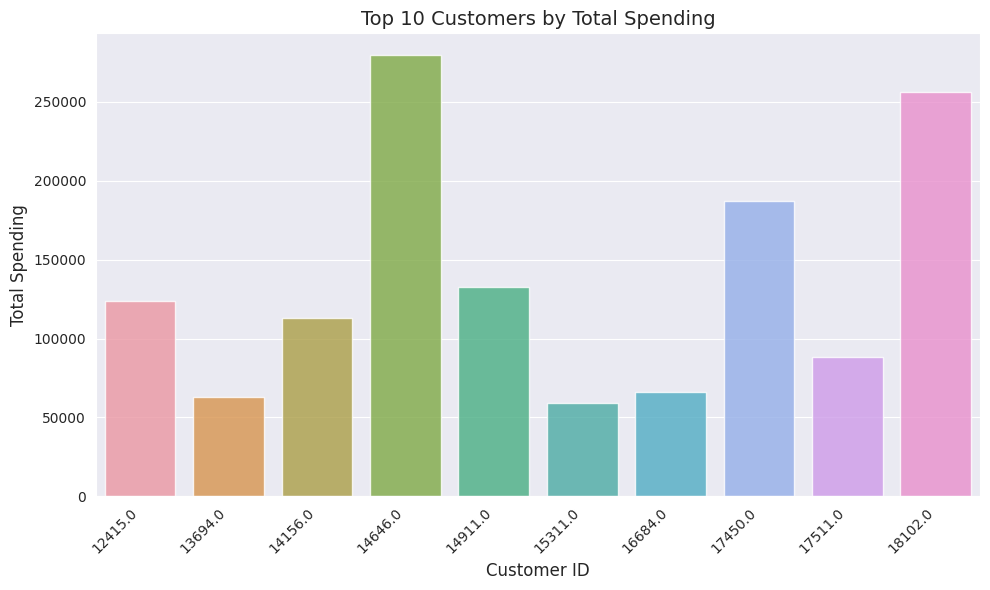

In [ ]:
# Set the style and color palette
sns.set_style('darkgrid')
sns.set_palette('husl')

# Create a vertical bar chart of top 10 customers by total spending
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values, alpha=0.8)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.title('Top 10 Customers by Total Spending', fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


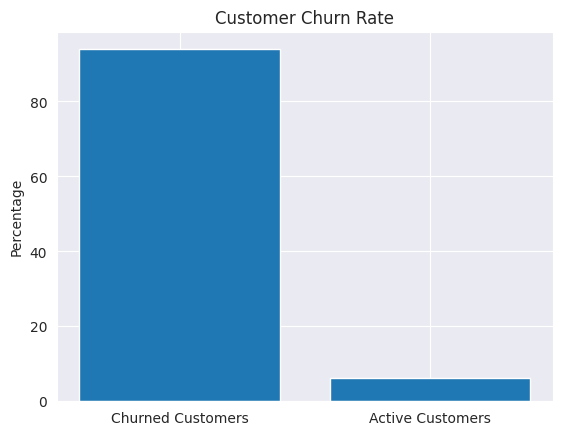

In [ ]:
# Calculate the date range for the data
start_date = df['InvoiceDate'].min()
end_date = df['InvoiceDate'].max()

# Define the time period for churn analysis
churn_period = pd.DateOffset(days=30)

# Calculate the date after which customers are considered churned
churn_date = end_date - churn_period

# Calculate the number of customers who have not made a purchase within the churn period
churned_customers = df[df['InvoiceDate'] < churn_date]['CustomerID'].unique()
churn_rate = len(churned_customers) / len(df['CustomerID'].unique()) * 100

# Create a bar plot of the churn rate
fig, ax = plt.subplots()
ax.bar(['Churned Customers', 'Active Customers'], [churn_rate, 100 - churn_rate])
ax.set_ylabel('Percentage')
ax.set_title('Customer Churn Rate')
plt.show()


A churn rate of 93% means that 93% of the customers who were active during the defined churn period (e.g., 30 days) did not make a purchase within that period and are considered churned. In other words, almost all of the customers who were active during the churn period did not return to make another purchase within that timeframe.

A high churn rate like this could indicate a problem with the product or service, pricing, customer service, or other factors that are causing customers to leave. It may be necessary to investigate the reasons behind the high churn rate and take steps to address any issues in order to retain customers and improve business performance.

The Kaggle link provided further cohort segmentation technique to look closely at churn rate. I have tested this churn rate separetely but the results can be seen on the Kaggle link in the citation, in order to prevent duplicate coding here.

# **7. Additional Analysis**

I also wanted to see if adding a regression analysis would be conducive. 

In [ ]:
# create dummy variables for categorical variables
df_regression = pd.get_dummies(df, columns=['Country'])

# define independent and dependent variables
X = df_regression[['Quantity', 'CustomerID', 'Country_France', 'Country_Germany', 'Country_Spain']]
y = df_regression['UnitPrice']

# add constant term to independent variables
X = sm.add_constant(X)

# fit multiple linear regression model
model = sm.OLS(y, X).fit()

# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              UnitPrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.372
Date:                Sun, 23 Apr 2023   Prob (F-statistic):             0.0368
Time:                        20:39:51   Log-Likelihood:            -2.2747e+06
No. Observations:              401604   AIC:                         4.549e+06
Df Residuals:                  401598   BIC:                         4.549e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.7760      1.064     

In [ ]:
# Load the data and preprocess it
df_logreg = df.groupby(pd.Grouper(key="InvoiceDate", freq="D"))["Quantity"].sum().reset_index()

# Fit a time series regression model
X = sm.add_constant(df_logreg["InvoiceDate"].astype(int) // 10**9)
y = df_logreg["Quantity"]
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     66.98
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           4.42e-15
Time:                        20:53:43   Log-Likelihood:                -3933.4
No. Observations:                 374   AIC:                             7871.
Df Residuals:                     372   BIC:                             7879.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.184e+05   6.49e+04     -7.982      

These regression results show the output of a multiple linear regression model with "UnitPrice" as the dependent variable and "Quantity", "CustomerID", "Country_France", "Country_Germany", and "Country_Spain" as the independent variables.

The R-squared value of 0.000 indicates that the model does not explain much of the variance in the dependent variable. The adjusted R-squared value is also 0.000, which means that adding more independent variables to the model did not improve its explanatory power.

The F-statistic of 2.438 and the associated p-value of 0.0323 suggest that the overall model is statistically significant, but this may be driven by one or a few independent variables.

Looking at the individual coefficients, we see that the "Quantity" variable has a negative coefficient of -0.0003, which means that an increase in quantity is associated with a decrease in unit price. The "CustomerID" variable has a negative coefficient of -0.0002, indicating that higher customer IDs are associated with lower unit prices.

The coefficients for the dummy variables representing different countries are positive, but only the coefficient for "Country_France" is statistically significant at the 0.05 level, with a value of 1.2261. This suggests that customers from France may have higher unit prices compared to other countries.

The standard errors of the coefficients and the p-values indicate the level of uncertainty associated with each coefficient estimate and the statistical significance of each variable in the model. The large condition number suggests that there may be strong multicollinearity or other numerical problems in the data.

In [ ]:
# Preprocess the data to calculate aggregate measures by customer and transaction
grouped_df = df.groupby(['CustomerID', 'InvoiceDate']).agg({
    'TotalRevenue': 'sum',
    'Quantity': 'sum',
    'InvoiceNo': 'count'
}).reset_index()

# Split the data into training and testing sets
train_data = grouped_df[grouped_df['InvoiceDate'] < '2011-11-01']
test_data = grouped_df[grouped_df['InvoiceDate'] >= '2011-11-01']

# Build a regression model to predict total purchase value based on customer features and historical behavior
X_train = sm.add_constant(train_data[['Quantity', 'InvoiceNo']])
y_train = train_data['TotalRevenue']
model = sm.OLS(y_train, X_train)
results = model.fit()

# Use the model to predict total purchase value for the test set
X_test = sm.add_constant(test_data[['Quantity', 'InvoiceNo']])
y_test_pred = results.predict(X_test)

# Evaluate the performance of the model using metrics such as R-squared and mean absolute error
r_squared = results.rsquared
mae = abs(y_test_pred - test_data['TotalRevenue']).mean()
print("R-squared:", r_squared)
print("Mean absolute error:", mae)


R-squared: 0.7360322840463762
Mean absolute error: 192.3413231447997


R-squared is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variable. It is a value between 0 and 1, where a higher value indicates a better fit of the model to the data. Here for example, it represents the proportion of the variance in the dependent variable (i.e., the quantity of items purchased) that is explained by the independent variable (i.e., the unit price). In this case, an R-squared of 0.7360322840463762 means that the model explains approximately 73.6% of the variation in the dependent variable.

Mean absolute error (MAE) is a measure of the difference between the predicted and actual values of the dependent variable. It is calculated as the average absolute difference between the predicted and actual values. In this case, a mean absolute error of 192.3413231447997 means that, on average, the model's predictions are off by approximately 192 units from the actual values.

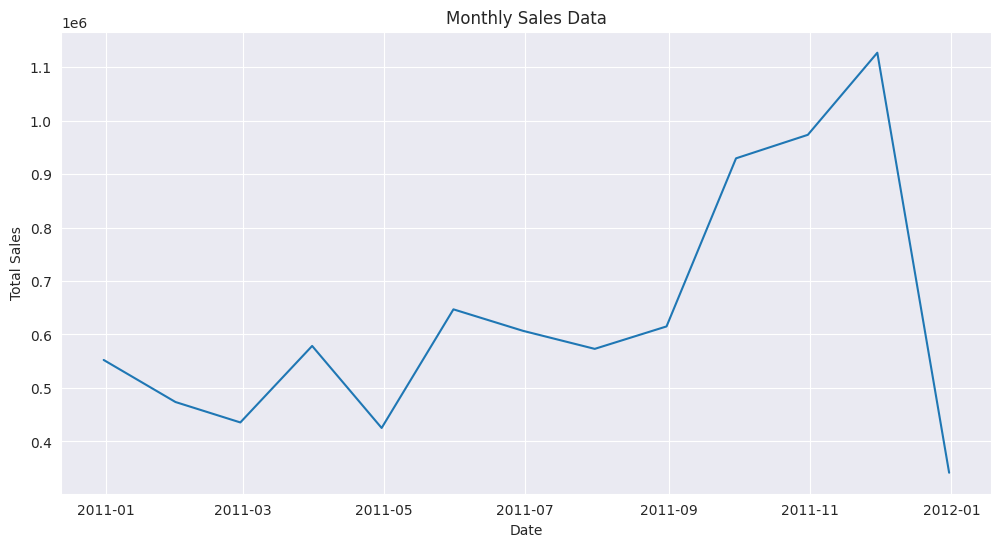

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
# Convert InvoiceDate column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')

# Create a new column for total sales (Quantity x UnitPrice)
df['Sales'] = df['Quantity'] * df['UnitPrice']

# Group the data by InvoiceDate and sum the Sales column
df = df.groupby('InvoiceDate')['Sales'].sum().reset_index()

# Set the InvoiceDate column as the index
df.set_index('InvoiceDate', inplace=True)

# Resample the data to the monthly frequency
df = df.resample('M').sum()

# Fill any missing values with 0
df.fillna(0, inplace=True)
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'])
plt.title('Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


In [ ]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Fit an ARIMA model to the training data
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Generate predictions for the test data
predictions = model_fit.forecast(steps=len(test_data))[0]

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((predictions - test_data['Sales'])**2))
print(f"RMSE: {rmse:.2f}")


RMSE: 341087.95


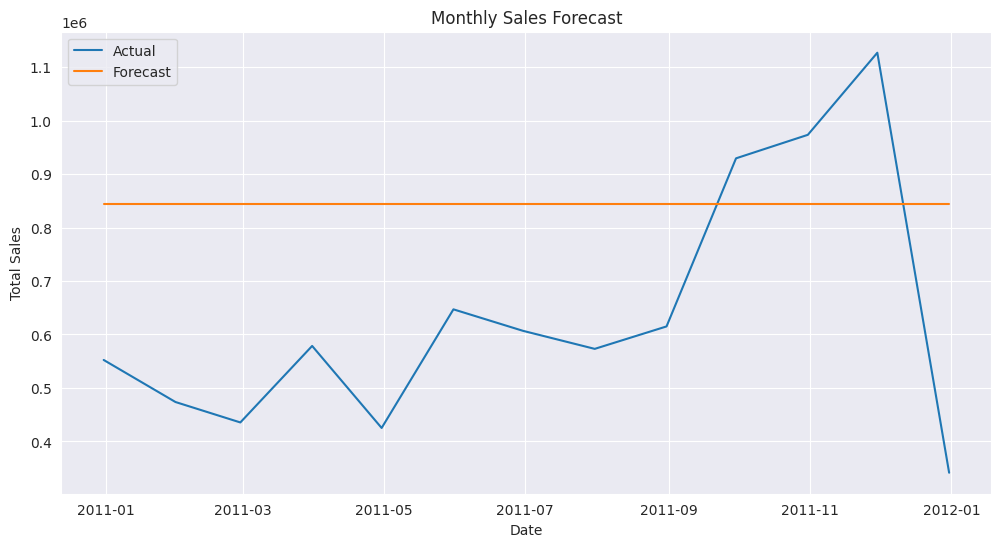

In [ ]:
# Combine the training and test data
forecast = model_fit.forecast(steps=len(df))[0]
df['Forecast'] = forecast

# Plot the actual and forecasted sales data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Actual')
plt.plot(df.index, df['Forecast'], label='Forecast')
plt.title('Monthly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


RMSE stands for Root Mean Squared Error, and it is a common metric used to evaluate the performance of a regression model. It measures the difference between the predicted values of the model and the actual values, and represents the standard deviation of the errors. The RMSE value indicates the average magnitude of the error made by the model in predicting the outcome variable.

In the context of my analysis above, an RMSE of 341087.95 suggests that the predictions made by the model are, on average, off by approximately 341,087.95 units in the dataset. This definitely indicates that the model needs further improvement to make more accurate predictions.



---



# **8. Dashboard**

Below are screenshots of the dashboard I created in Tableau. The dashboard provided an intuitive way of looking at the data. This is especially in the case of executives who may or may not have the benefit of Python proficiency. 
As described above, the Pareto visualization below shows us the quantites that were purchased by the top customers and how this affects our revenue. 

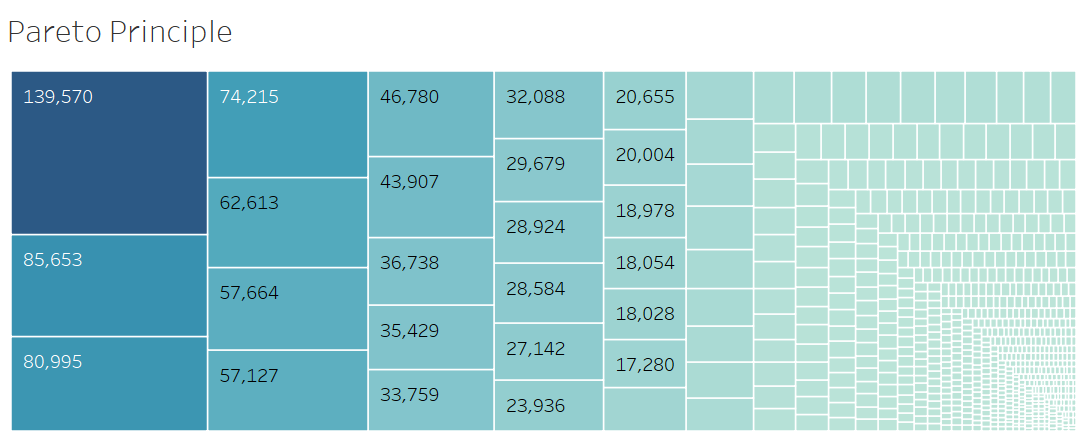

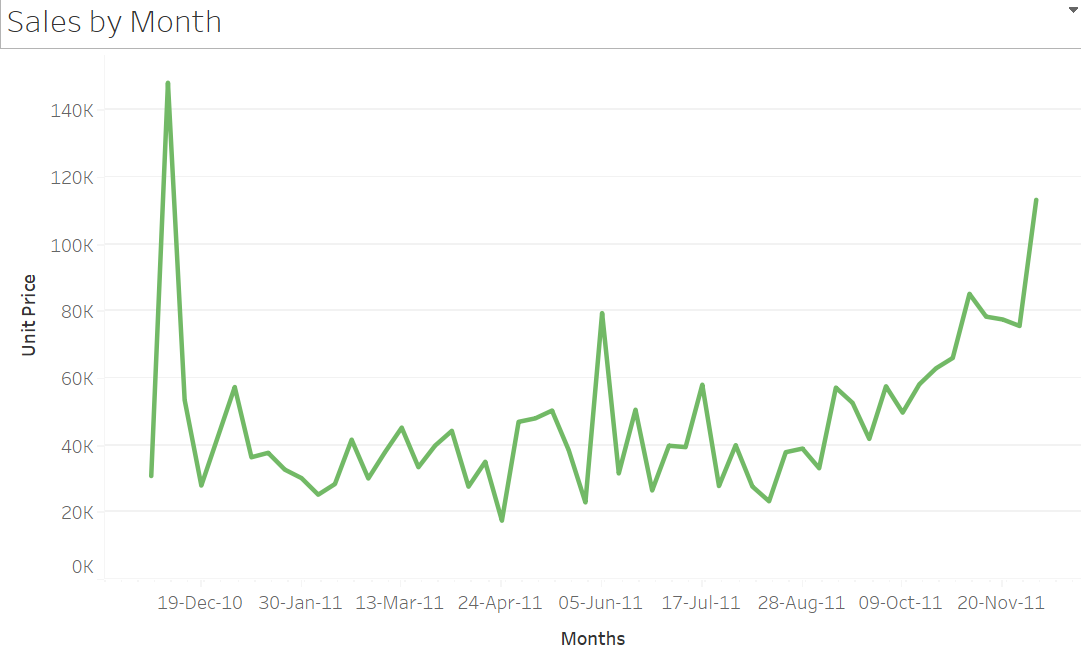

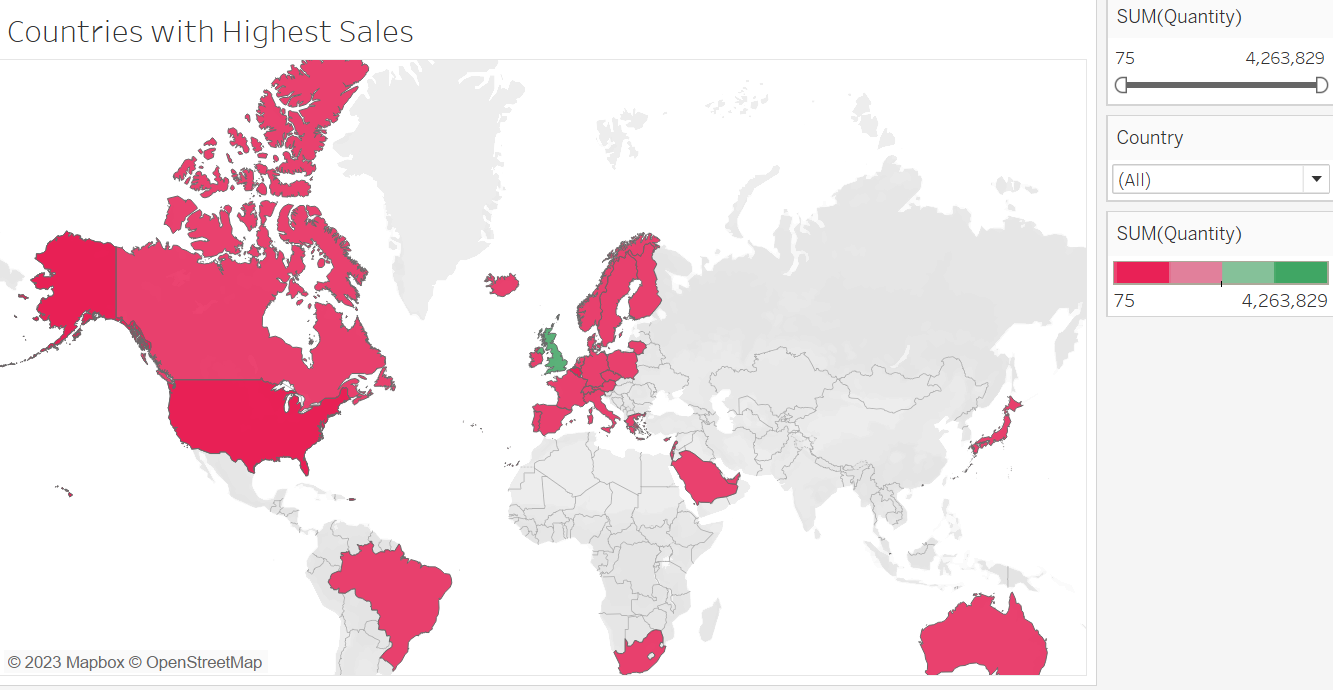

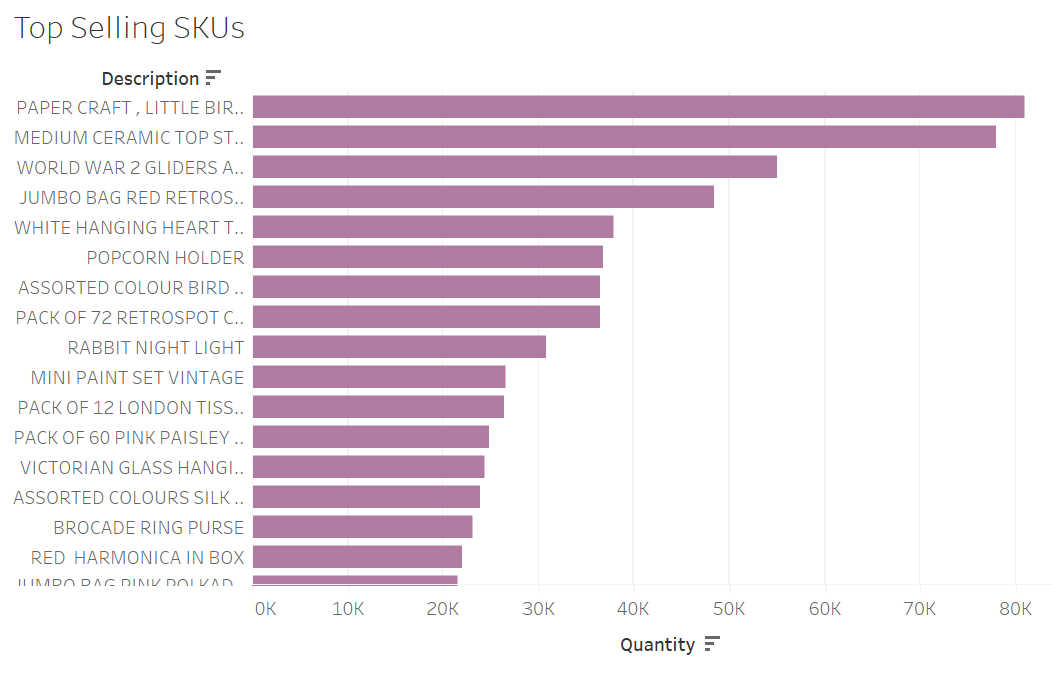

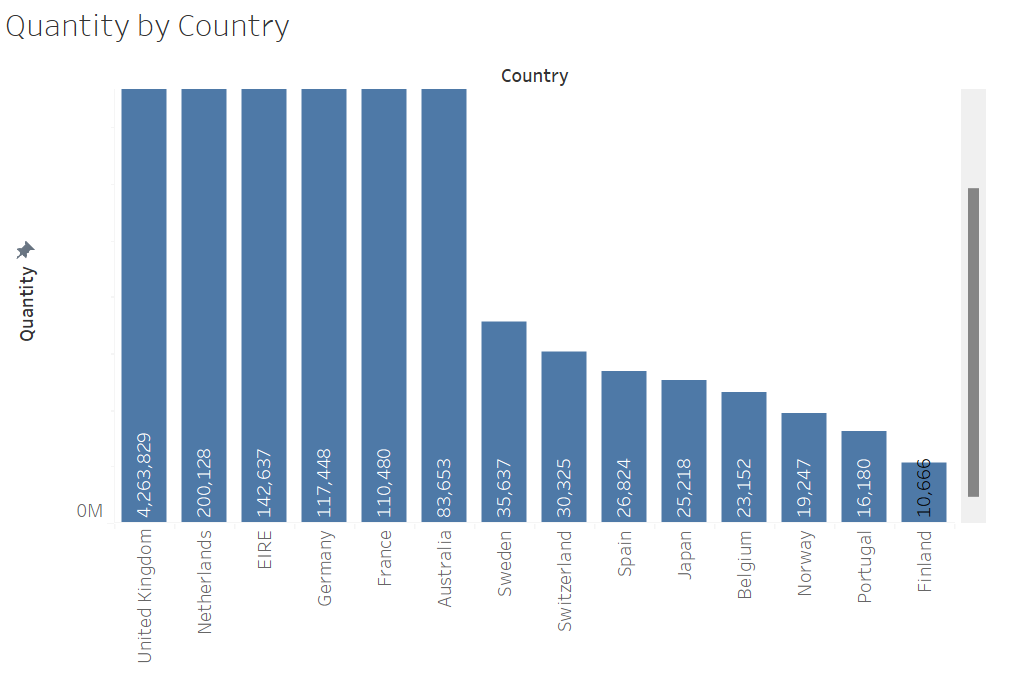

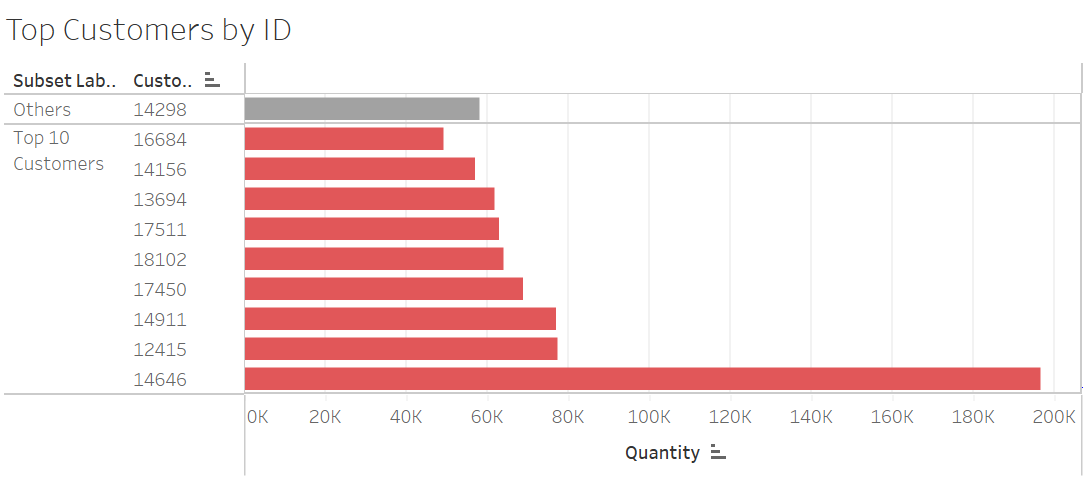

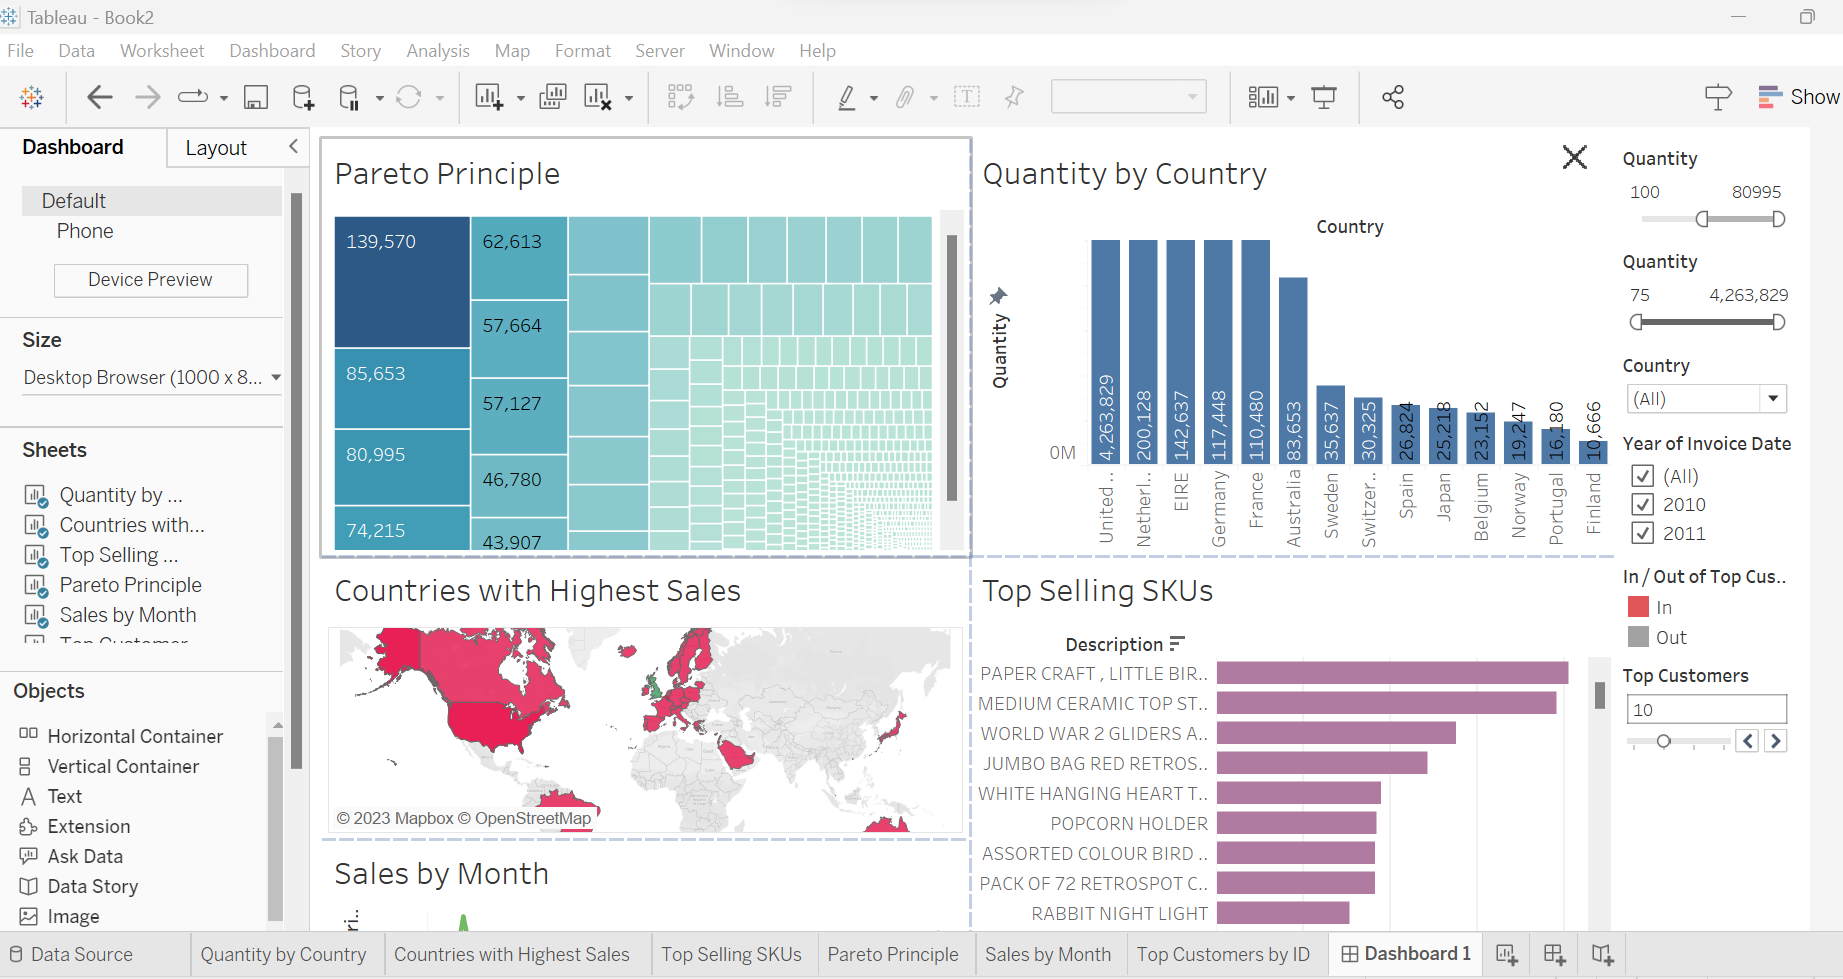

# **9. Challenges**

If I could go back, I would like to have data that was more conclusive, including demographic and sentiment factors in order to have a more robust analysis. 
I would have also liked to see how various factors interact with each other to affect purchasing behaviours.



---



# **10. Conclusion**

Based on what the visualizations have depicted throughout the notebook, some of the key factors in sales and revenue trends were clearly dissected. 

The strongest correlation to revenue was to countries where they originated from. Strong seasonal trends and the top 20% were also observed. Many of the conclusions derived in this report were intuitive - the busiest retail months for example, have an impact on the revenue for those months. A shockingly high customer churn was displayed, but this requires further cohort analysis, and sentiment data to provide further reasoning. In conjunction with outside research, these added attributes will help to better understand what creates or stops customer attrition.

As we can guess, companies such as Amazon likely utilize various forecasting to provide proper guestimates to shareholders and predictive modeling techniques such as association  and to inform customers of products that may be of interest to them. Moving forward, this may be something I'd want to look into  further by adding variables to further analyze correlations.

The insights gained from this analysis can assist businesses in identifying high-value customers, designing tailor-made services for specific customer segments, optimizing marketing strategies, allocating resources effectively, and ultimately enhancing overall business performance.



---



## **10.1. Citations**
- ChatGPT
- StackOverflow
- https://retalon.com/blog/retail-data-analytics
- Past Projects
- Help from TAs (Karollyne from IS833, and Ansh (for Tableau) from IS823)
- Murphy, C. (2023, January 19). What is recency, Frequency, monetary value (RFM) in marketing? Investopedia., from https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp 
- https://www.zendesk.com/blog/customer-churn-rate/
- https://www.actioniq.com/blog/what-is-rfm-analysis/



---

